# Import the Dependencies

In [73]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

In [74]:
#loading the dataset to a Pandas Dataframe

credit_card_data = pd.read_csv('creditcard.csv')

In [75]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [76]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [77]:
# dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [78]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Exploratory Data Analysis

In [79]:
# distribution of legit transactions and fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [80]:
credit_card_data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

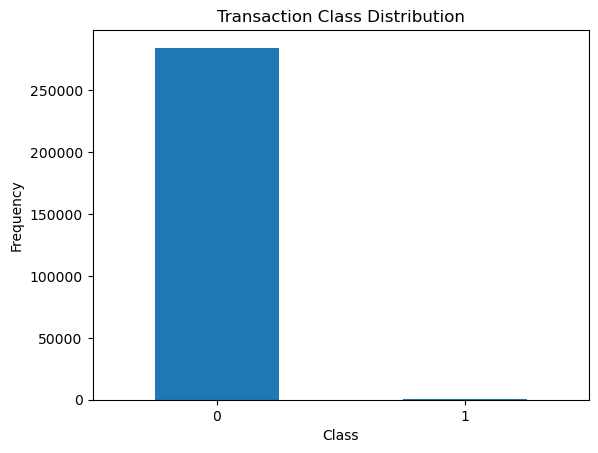

In [81]:
count_classes = pd.value_counts(credit_card_data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

In [82]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [83]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [84]:
# Find outlier fraction
outlierfraction = len(fraud)/float(len(legit))

In [85]:
outlierfraction

0.0017304750013189597

In [86]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [87]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

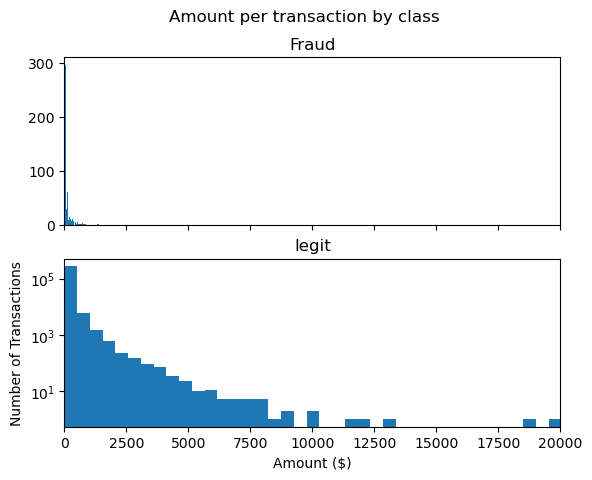

In [88]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(legit.Amount, bins = bins)
ax2.set_title('legit')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [89]:
# Get correlations of each features in dataset  
corrmat = credit_card_data.corr()

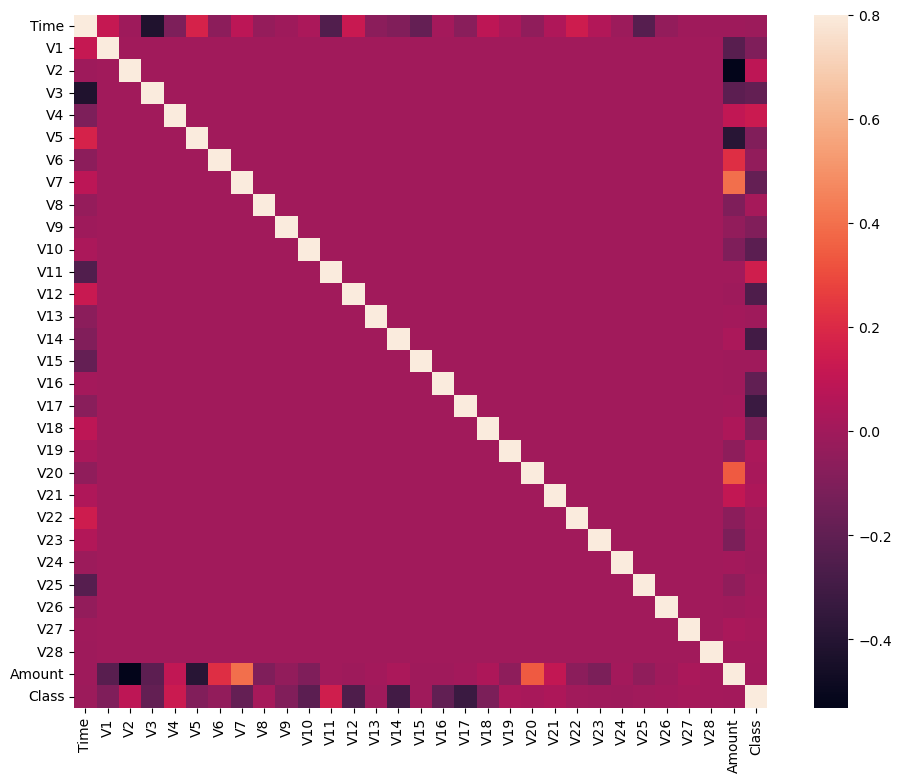

In [90]:
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8,square=True)
plt.show()

In [91]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [92]:
#Under-Sampling #random sampling
legit_sample = legit.sample(n=492)

In [93]:
#concatenating two dataframes
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [94]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8180,11045.0,1.297177,-0.132270,0.319283,-0.098062,-0.179858,0.239866,-0.612327,0.067419,1.666588,...,-0.110084,-0.117944,-0.184662,-0.993265,0.333168,1.098183,-0.099292,-0.019182,15.95,0
159047,112145.0,1.869273,-1.403184,-0.564733,-0.905581,-1.124431,-0.187552,-0.959620,-0.039109,-0.279099,...,0.528111,1.291103,-0.043196,-0.322192,-0.219021,-0.078078,-0.003843,-0.032614,148.00,0
282690,171070.0,1.916603,-0.303542,-0.664015,0.458824,-0.341271,-0.085775,-0.700175,0.049025,1.122552,...,-0.042073,-0.038011,0.257118,0.418220,-0.498556,0.318674,0.001839,0.002914,49.99,0
50448,44493.0,0.039952,0.913168,-1.166784,-0.363114,3.141638,3.146783,0.802224,0.268368,-0.095797,...,-0.043379,0.338297,-0.034859,1.001016,-0.554022,-0.462244,0.096089,-0.171891,1.66,0
240313,150548.0,0.134400,-0.020797,1.069986,-1.212864,-0.402335,-0.011746,-0.226255,0.122371,-0.666945,...,-0.121143,-0.347929,0.163682,0.622515,-1.004508,-0.499370,0.214272,0.203190,2.00,0


In [95]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [96]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [97]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95981.272358,0.031465,-0.008259,0.056106,0.061358,-0.030271,0.095113,0.016116,0.080306,0.053330,...,0.005437,0.047087,0.023454,0.032597,-0.039256,-0.042303,0.022144,-0.013097,0.003930,92.025630
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [98]:
#Spitting the data into features and targets
X = new_dataset.drop(columns= 'Class', axis=1)
Y = new_dataset['Class']

In [99]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
8180     11045.0  1.297177 -0.132270  0.319283 -0.098062 -0.179858  0.239866   
159047  112145.0  1.869273 -1.403184 -0.564733 -0.905581 -1.124431 -0.187552   
282690  171070.0  1.916603 -0.303542 -0.664015  0.458824 -0.341271 -0.085775   
50448    44493.0  0.039952  0.913168 -1.166784 -0.363114  3.141638  3.146783   
240313  150548.0  0.134400 -0.020797  1.069986 -1.212864 -0.402335 -0.011746   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [100]:
print(Y)

8180      0
159047    0
282690    0
50448     0
240313    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [124]:
# Split the data into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [102]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Training

# Logistic Regression

In [103]:
log = LogisticRegression()

In [104]:
# Training the Logistic Regression Model with Training Data
log.fit(X_train, Y_train)

LogisticRegression()

In [105]:
y_pred1 = log.predict(X_test)

In [106]:
accuracy_score(Y_test,y_pred1)

0.9187817258883249

In [107]:
# Precision score
precision_score(Y_test,y_pred1)

0.9456521739130435

In [108]:
# Recall score
recall_score(Y_test,y_pred1)

0.8877551020408163

In [109]:
# F1 score
f1_score(Y_test,y_pred1)

0.9157894736842105

# Decision Tree Classifier

In [110]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [111]:
y_pred2 = dt.predict(X_test)

In [112]:
accuracy_score(Y_test,y_pred2)

0.883248730964467

In [113]:
precision_score(Y_test,y_pred2)

0.8571428571428571

In [114]:
recall_score(Y_test,y_pred2)

0.9183673469387755

In [115]:
f1_score(Y_test,y_pred2)

0.8866995073891625

# Random Forest Classifier

In [116]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [117]:
y_pred3 = rf.predict(X_test)

In [118]:
accuracy_score(Y_test,y_pred3)

0.9137055837563451

In [119]:
precision_score(Y_test,y_pred3)

0.945054945054945

In [120]:
recall_score(Y_test,y_pred3)

0.8775510204081632

In [121]:
f1_score(Y_test,y_pred3)

0.91005291005291

In [122]:
final_data = pd.DataFrame({'Models' : ['LR', 'DT', 'RF'],
                          "ACC" :[accuracy_score(Y_test,y_pred1)*100,
                                 accuracy_score(Y_test,y_pred2)*100,
                                 accuracy_score(Y_test,y_pred3)*100,
                                 ]})

In [123]:
final_data

,Models,ACC
0,LR,91.878173
1,DT,88.324873
2,RF,91.370558


# Build Random Forest Model with Hyperparameters

In [63]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of level in tree
max_depth = [2,4]
# Minimum number of samples required to split a node 
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [64]:
# Create the param grid 
param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [65]:
rf_Model = RandomForestClassifier()

In [67]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = 4)

In [68]:
rf_Grid.fit(X_train, Y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


C:\Users\Vijay Sharma\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
257 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vijay Sharma\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vijay Sharma\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Vijay Sharma\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Vij

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [69]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 41}

In [70]:
print(f'Train Accuracy - : {rf_Grid.score(X_train, Y_train):.3f}')
print(f'Train Accuracy - : {rf_Grid.score(X_test, Y_test):.3f}')

Train Accuracy - : 0.952
Train Accuracy - : 0.904


# Save the Model

In [58]:
rf1 = RandomForestClassifier()
rf1.fit(X_train,Y_train)

RandomForestClassifier()

In [59]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [60]:
model = joblib.load("credit_card_model")

In [71]:
pred = model.predict([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ]])

C:\Users\Vijay Sharma\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [72]:
if pred == 0:
    print("Normal Transaction")
else:
    print("Fraudalent Transaction")

Normal Transaction
